In [100]:
# API LINK RETRIEVED
# https://dev.meteostat.net/api/

In [101]:
# required imports
import pandas as pd
import numpy as np
import requests


In [102]:
url = "https://meteostat.p.rapidapi.com/stations/daily"

querystring = {"station":"10637","start":"2019-01-01","end":"2020-01-31"}

headers = {
	"X-RapidAPI-Key": "98fed68136msh49d44b591f2ab42p1a038ajsn11815f5da95b",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring) #, rapidapi-key == "98fed68136msh49d44b591f2ab42p1a038")


In [103]:
#print(response.text)

In [104]:
var = response.text

In [105]:
import json
json_data = json.loads(var)
#print(json_data)

In [106]:
#import pandas as pd
#df = pd.read_json()
#df.to_csv("data.csv")

In [107]:
# importing meteostate library and dependencies
from meteostat import Point, Daily
from datetime import datetime
import matplotlib.pyplot as plt

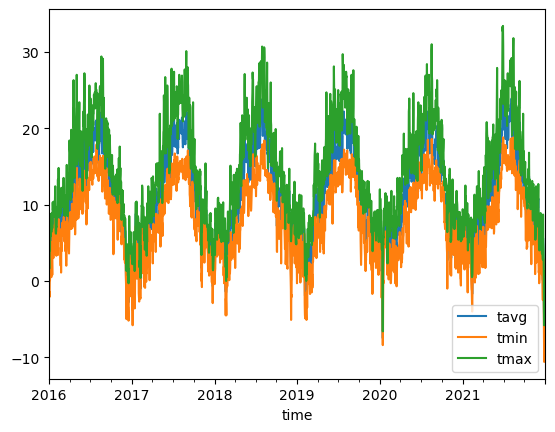

In [108]:
# Set time period
start = datetime(2016, 1, 1)
end = datetime(2021, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
vancouver_data = Daily(vancouver, start, end)
vancouver_data = vancouver_data.fetch()

# Plot line chart including average, minimum and maximum temperature
vancouver_data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [109]:
vancouver_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2016-01-01,0.5,-1.9,2.8,0.0,0.0,NaN,7.4,0.0,1030.3,NaN
2016-01-02,0.1,-1.4,1.6,0.0,0.0,NaN,8.0,0.0,1023.6,NaN
2016-01-03,0.7,-2.1,3.4,0.0,0.0,78.0,9.0,0.0,1016.5,NaN
2016-01-04,2.7,0.2,5.1,0.3,0.0,3.0,9.1,0.0,1008.4,NaN
2016-01-05,2.1,0.1,4.0,6.9,0.0,NaN,8.0,154.8,1003.1,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-8.2,-10.6,-5.8,0.0,10.0,90.0,4.0,NaN,1011.9,NaN
2021-12-28,-4.7,-8.4,-1.1,0.0,10.0,345.0,2.9,NaN,1010.5,NaN
2021-12-29,-4.3,-6.2,-2.4,0.0,0.0,54.0,4.8,NaN,1013.7,NaN


In [110]:
# datatypes
vancouver_data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='time', length=2192, freq='D')

In [111]:
vancouver_data.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

In [112]:
# missing data values

print(vancouver_data.isna().sum())

tavg       0
tmin       0
tmax       0
prcp       0
snow      48
wdir     334
wspd      15
wpgt     474
pres      46
tsun    2192
dtype: int64


### the tsun variable that indicates daily sunshine total in minutes is missing data entirely deciding to drop this 

In [114]:
# turn into dataframe
vc_data = pd.DataFrame(vancouver_data)

# drop tsun column entirely 

vc_data = vc_data.drop(['tsun'], axis=1)
vc_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
time,,,,,,,,,
2016-01-01,0.5,-1.9,2.8,0.0,0.0,NaN,7.4,0.0,1030.3
2016-01-02,0.1,-1.4,1.6,0.0,0.0,NaN,8.0,0.0,1023.6
2016-01-03,0.7,-2.1,3.4,0.0,0.0,78.0,9.0,0.0,1016.5
2016-01-04,2.7,0.2,5.1,0.3,0.0,3.0,9.1,0.0,1008.4
2016-01-05,2.1,0.1,4.0,6.9,0.0,NaN,8.0,154.8,1003.1
...,...,...,...,...,...,...,...,...,...
2021-12-27,-8.2,-10.6,-5.8,0.0,10.0,90.0,4.0,NaN,1011.9
2021-12-28,-4.7,-8.4,-1.1,0.0,10.0,345.0,2.9,NaN,1010.5
2021-12-29,-4.3,-6.2,-2.4,0.0,0.0,54.0,4.8,NaN,1013.7


In [131]:
# dropping all nan rows

new_vc_data = vc_data.dropna()
new_vc_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
time,,,,,,,,,
2016-01-03,0.7,-2.1,3.4,0.0,0.0,78.0,9.0,0.0,1016.5
2016-01-04,2.7,0.2,5.1,0.3,0.0,3.0,9.1,0.0,1008.4
2016-01-12,6.8,5.1,8.4,18.4,0.0,88.0,14.9,118.8,1011.2
2016-01-14,5.5,2.0,8.9,0.2,0.0,70.0,11.0,118.8,1013.7
2016-01-16,7.3,5.8,8.7,13.4,0.0,89.0,18.6,133.2,1007.0
...,...,...,...,...,...,...,...,...,...
2021-12-22,5.6,2.5,8.7,19.4,0.0,70.0,13.3,46.0,1000.2
2021-12-23,4.1,2.9,5.1,3.4,0.0,297.0,10.3,46.0,994.1
2021-12-24,2.3,0.5,4.2,12.8,0.0,30.0,9.7,39.0,991.1


array([[<AxesSubplot:title={'center':'tavg'}>,
        <AxesSubplot:title={'center':'tmin'}>,
        <AxesSubplot:title={'center':'tmax'}>],
       [<AxesSubplot:title={'center':'prcp'}>,
        <AxesSubplot:title={'center':'snow'}>,
        <AxesSubplot:title={'center':'wdir'}>],
       [<AxesSubplot:title={'center':'wspd'}>,
        <AxesSubplot:title={'center':'wpgt'}>,
        <AxesSubplot:title={'center':'pres'}>]], dtype=object)

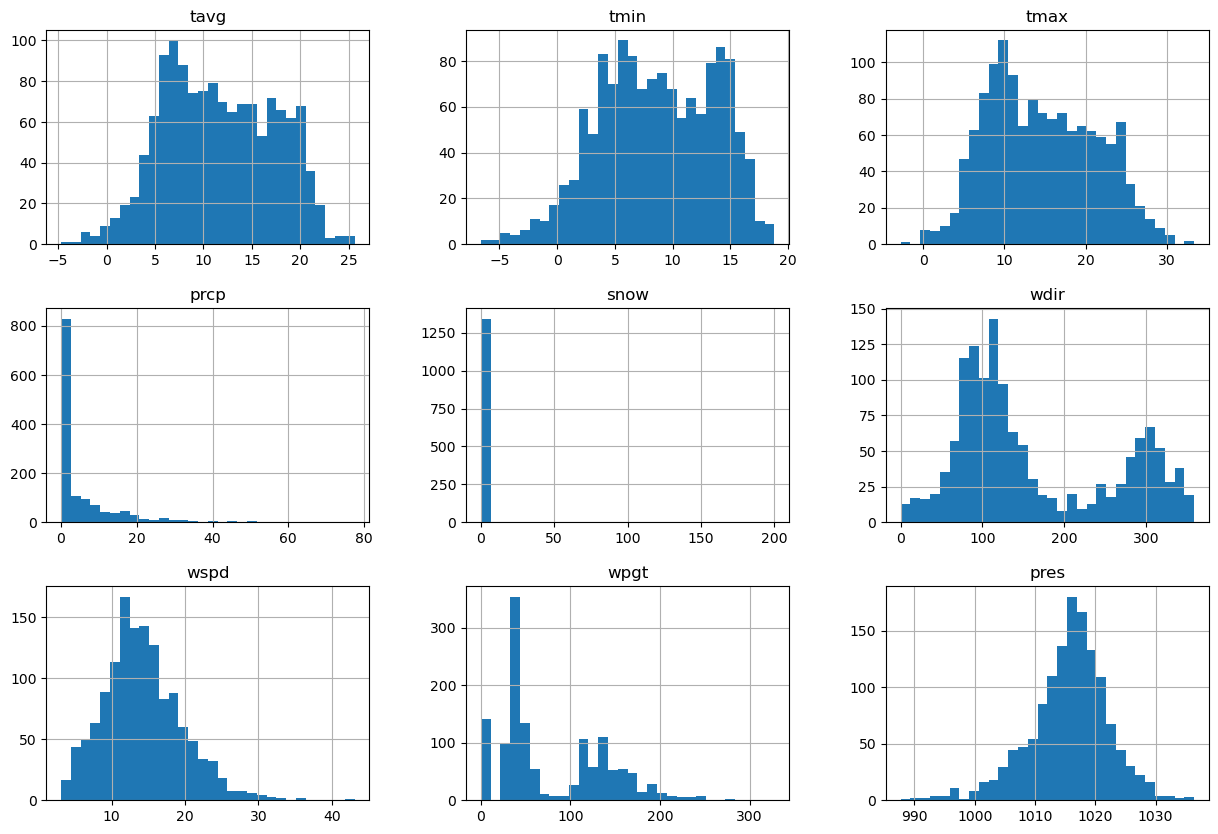

In [132]:
# var histograms 
new_vc_data.hist(bins = 30, figsize=(15,10))

## Predicting Missing Values with ML
https://python.plainenglish.io/predict-missing-dataframe-values-with-an-ml-algorithm-717cd872f1a8